In [25]:
# Package imports
import numpy as np
import copy
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets
from NN_1HiddenLayer_Utilities import *
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The shape of X is: (2, 200)
The shape of Y is: (1, 200)
I have m = 200 training examples!


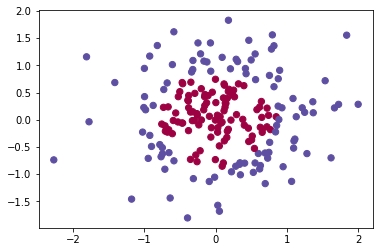

In [39]:
# Datasets
planars = load_planar_dataset()
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles,
           "no_structure": no_structure}

### START CODE HERE ### (choose your dataset)
dataset = "gaussian_quantiles"
### END CODE HERE ###

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2

plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

# (≈ 3 lines of code)
# shape_X = ...
# shape_Y = ...
# training set size
# m = ...
# YOUR CODE STARTS HERE
shape_X = X.shape
shape_Y = Y.shape
m = X.shape[1]
# YOUR CODE ENDS HERE

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

Accuracy of logistic regression: 59 % (percentage of correctly labelled datapoints)


/home/vss/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


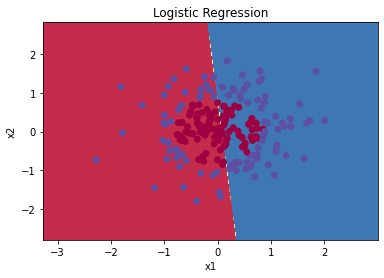

In [40]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

Cost after iteration 0: 0.693150
Cost after iteration 1000: 0.097901
Cost after iteration 2000: 0.040506
Cost after iteration 3000: 0.027624
Cost after iteration 4000: 0.021965
Cost after iteration 5000: 0.018008
Cost after iteration 6000: 0.015368
Cost after iteration 7000: 0.013560
Cost after iteration 8000: 0.012195
Cost after iteration 9000: 0.011109


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

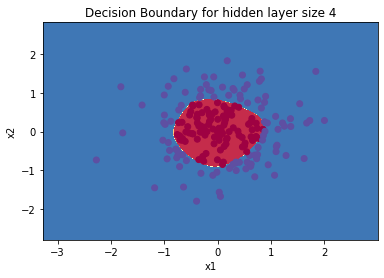

In [41]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 10, num_iterations = 10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 81.0 %
Accuracy for 3 hidden units: 98.0 %
Accuracy for 4 hidden units: 100.0 %
Accuracy for 5 hidden units: 95.5 %
Accuracy for 20 hidden units: 100.0 %
Accuracy for 50 hidden units: 100.0 %


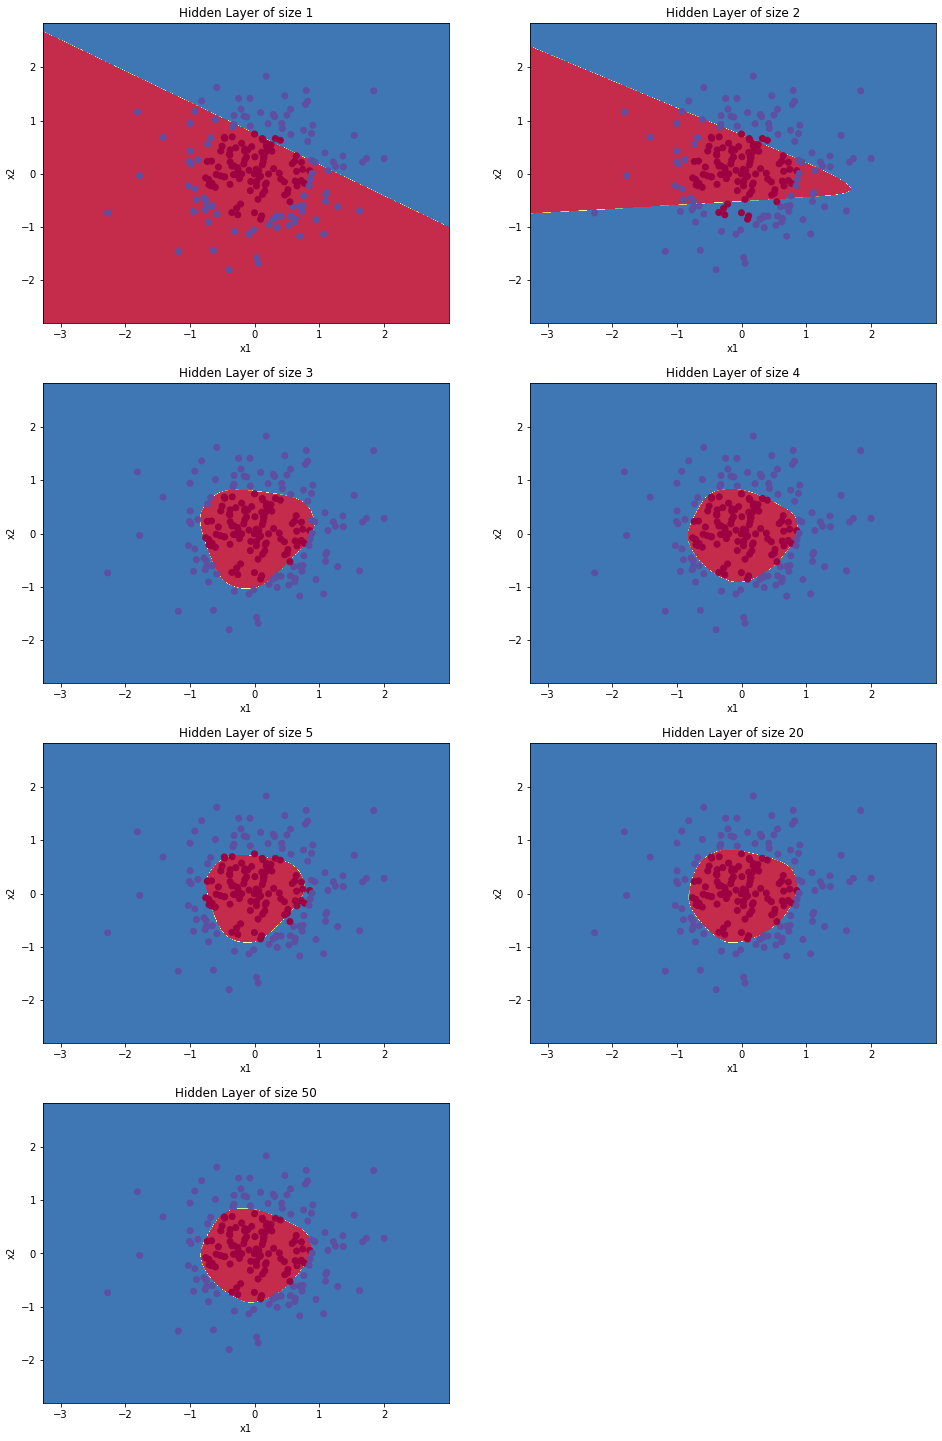

In [42]:
# This may take about 2 minutes to run

plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))